### topGO analysis
following the documentation for topGO https://bioconductor.org/packages/devel/bioc/vignettes/topGO/inst/doc/topGO.pdf

topGO used for identifying over-represented GO terms associated with these genes

- nodes: GO terms in the ontology hierarchy - each terem in the ontology is considered a node, and the hierarchy is represented as a tree

In [1]:
# installing topGO
BiocManager::install("topGO")
library(topGO)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'topGO'”
Old packages: 'BH', 'brew', 'brio', 'bslib', 'curl', 'data.table', 'DBI',
  'desc', 'digest', 'GenomicAlignments', 'ggfun', 'ggrepel', 'glue',
  'GOSemSim', 'graphlayouts', 'haven', 'htmlwidgets', 'httpuv', 'MASS',
  'Matrix', 'mgcv', 'nlme', 'patchwork', 'pbdZMQ', 'pkgbuild', 'pkgload', 'ps',
  'ragg', 'Rcpp', 'RcppArmadillo', 'RCurl', 'readr', 'reprex', 'Rhtslib',
  'rlang', 'RSQLite', 'scales', 'shadowtext', 'shiny', 'SparseArray',
  'testthat', 'timechange', 'uuid', 'vroom', 'withr', 'xml2', 'yulab.utils'

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The 

In [2]:
# installing GO.db
BiocManager::install("GO.db")
library(GO.db)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'GO.db'”
Old packages: 'BH', 'brew', 'brio', 'bslib', 'curl', 'data.table', 'DBI',
  'desc', 'digest', 'GenomicAlignments', 'ggfun', 'ggrepel', 'glue',
  'GOSemSim', 'graphlayouts', 'haven', 'htmlwidgets', 'httpuv', 'MASS',
  'Matrix', 'mgcv', 'nlme', 'patchwork', 'pbdZMQ', 'pkgbuild', 'pkgload', 'ps',
  'ragg', 'Rcpp', 'RcppArmadillo', 'RCurl', 'readr', 'reprex', 'Rhtslib',
  'rlang', 'RSQLite', 'scales', 'shadowtext', 'shiny', 'SparseArray',
  'testthat', 'timechange', 'uuid', 'vroom', 'withr', 'xml2', 'yulab.utils'



In [27]:
# reading in data of significant genes
gene_data <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/significant_genes/sig_p1_wc_genes.csv')
head(gene_data)
dim(gene_data)

# creating list of just gene names 
sig_genes <- gene_data$Row.names
head(sig_genes)

,X,Row.names,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,BBB.WBO.B21,BBB.WBV.B70,⋯,WPV.BPR.G11,seqname,source,feature,start,end,score,strand,frame,attributes
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,1,LOC111099115,46.83069,1.7885864,0.3885554,4.603170,4.161092e-06,0.0002004183,137,141,⋯,5,NC_035780.1,Gnomon,gene,1840607,1842557,.,-,.,"gene_id ""LOC111103177""; db_xref ""GeneID:111103177""; gbkey ""Gene""; gene ""LOC111103177""; gene_biotype ""protein_coding"";"
2,2,LOC111099216,29.51165,1.4828614,0.4401508,3.368985,7.544561e-04,0.0125496496,61,59,⋯,1,NC_035780.1,Gnomon,gene,3517611,3518657,.,+,.,"gene_id ""LOC111132154""; db_xref ""GeneID:111132154""; gbkey ""Gene""; gene ""LOC111132154""; gene_biotype ""lncRNA"";"
3,3,LOC111099417,51.70011,2.7487429,0.6879361,3.995637,6.452048e-05,0.0019567084,101,98,⋯,3,NC_035780.1,Gnomon,gene,3920144,3928549,.,+,.,"gene_id ""LOC111112068""; db_xref ""GeneID:111112068""; gbkey ""Gene""; gene ""LOC111112068""; gene_biotype ""protein_coding"";"
4,4,LOC111099424,16.12747,3.4384445,0.8269653,4.157907,3.211770e-05,0.0010745946,57,50,⋯,2,NC_035780.1,Gnomon,gene,4012455,4013027,.,+,.,"gene_id ""LOC111130177""; db_xref ""GeneID:111130177""; gbkey ""Gene""; gene ""LOC111130177""; gene_biotype ""protein_coding"";"
5,5,LOC111099722,593.62230,0.8993515,0.2324598,3.868847,1.093514e-04,0.0028699825,1591,1713,⋯,153,NC_035780.1,Gnomon,gene,8951007,8951628,.,-,.,"gene_id ""LOC111114945""; db_xref ""GeneID:111114945""; gbkey ""Gene""; gene ""LOC111114945""; gene_biotype ""lncRNA"";"
6,6,LOC111099918,87.23670,0.6567512,0.2251842,2.916507,3.539745e-03,0.0407210025,328,280,⋯,6,NC_035780.1,Gnomon,gene,11951821,11976757,.,+,.,"gene_id ""LOC111112589""; db_xref ""GeneID:111112589""; gbkey ""Gene""; gene ""LOC111112589""; gene_biotype ""protein_coding"";"


[1] 405  47

[1] "LOC111099115" "LOC111099216" "LOC111099417" "LOC111099424" "LOC111099722"
[6] "LOC111099918"

In [28]:
# reading in GO info
GO_list <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/GO_enrichment_analysis/gene_GOid.csv')
head(GO_list)

,gene_name,GO_id
,<chr>,<chr>
1,LOC111106242,GO:0005737; GO:0006693; GO:0032440; GO:0047522
2,LOC111108431,GO:0005737; GO:0006693; GO:0032440; GO:0047522
3,LOC111118924,GO:0004315; GO:0006633; GO:0008757; GO:0016491; GO:0031177
4,LOC111121098,GO:0005739; GO:0006869; GO:0008289; GO:0016747
5,LOC111121098,GO:0005739; GO:0006869; GO:0008289; GO:0016747
6,LOC111121707,GO:0004315; GO:0006633; GO:0008757; GO:0016491; GO:0031177


In [29]:
# checking out number of genes in gene universe vs. genes of interest
dim(GO_list) # 50,432 genes in gene universe (total)
length(sig_genes) # 405 genes of interest

[1] 50432     2

[1] 405

In [30]:
## NEED , BETWEEN GO TERMS NOT ;

# Read the content of the file into a character vector
file_path <- "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/GO_enrichment_analysis/gene_GOid.txt"
file_content <- readLines(file_path, warn = FALSE)

# Replace ';' with ','
file_content <- gsub(";", ",", file_content)

# Write the modified content back to the file
writeLines(file_content, file_path)


In [31]:
# creating custom annotation file
GO_file <- read.table('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/GO_enrichment_analysis/gene_GOid2.tab', header=TRUE)
head(GO_file)
dim(GO_file) # 34,237 genes

,gene_name,GO_id
,<chr>,<chr>
1,LOC111106242,GO:0005737; GO:0006693; GO:0032440; GO:0047522
2,LOC111108431,GO:0005737; GO:0006693; GO:0032440; GO:0047522
3,LOC111118924,GO:0004315; GO:0006633; GO:0008757; GO:0016491; GO:0031177
4,LOC111121098,GO:0005739; GO:0006869; GO:0008289; GO:0016747
5,LOC111121098,GO:0005739; GO:0006869; GO:0008289; GO:0016747
6,LOC111121707,GO:0004315; GO:0006633; GO:0008757; GO:0016491; GO:0031177


[1] 34237     2

In [32]:
geneID2GO <- readMappings(file = '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/GO_enrichment_analysis/gene_GOid.txt')
geneID2GO <- geneID2GO[-1] # removes header
head(geneID2GO)

$LOC111106242
[1] "GO:0005737" "GO:0006693" "GO:0032440" "GO:0047522"

$LOC111108431
[1] "GO:0005737" "GO:0006693" "GO:0032440" "GO:0047522"

$LOC111118924
[1] "GO:0004315" "GO:0006633" "GO:0008757" "GO:0016491" "GO:0031177"

$LOC111121098
[1] "GO:0005739" "GO:0006869" "GO:0008289" "GO:0016747"

$LOC111121098
[1] "GO:0005739" "GO:0006869" "GO:0008289" "GO:0016747"

$LOC111121707
[1] "GO:0004315" "GO:0006633" "GO:0008757" "GO:0016491" "GO:0031177"

In [33]:
geneNames <- names(geneID2GO)
head(geneNames)

[1] "LOC111106242" "LOC111108431" "LOC111118924" "LOC111121098" "LOC111121098"
[6] "LOC111121707"

In [34]:
geneList <- factor(as.integer(geneNames %in% sig_genes))
names(geneList) <- geneNames
str(geneList)

 Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "names")= chr [1:50432] "LOC111106242" "LOC111108431" "LOC111118924" "LOC111121098" ...


looking at just **molecular function** ontology

In [35]:
GOdata <- new("topGOdata", ontology = "MF", allGenes = geneList,annot = annFUN.gene2GO, gene2GO = geneID2GO)


Building most specific GOs .....

	( 1275 GO terms found. )


Build GO DAG topology ..........

	( 1732 GO terms and 2265 relations. )


Annotating nodes ...............

	( 15560 genes annotated to the GO terms. )



In [36]:
GOdata # getting summary


------------------------- topGOdata object -------------------------

 Description:
   -   

 Ontology:
   -  MF 

 50432 available genes (all genes from the array):
   - symbol:  LOC111106242 LOC111108431 LOC111118924 LOC111121098 LOC111121098  ...
   - 1047  significant genes. 

 23328 feasible genes (genes that can be used in the analysis):
   - symbol:  LOC111106242 LOC111108431 LOC111118924 LOC111121098 LOC111121098  ...
   - 596  significant genes. 

 GO graph (nodes with at least  1  genes):
   - a graph with directed edges
   - number of nodes = 1732 
   - number of edges = 2265 

------------------------- topGOdata object -------------------------


In [37]:
resultFisher <- runTest(GOdata, algorithm = "classic", statistic = "fisher")


			 -- Classic Algorithm -- 

		 the algorithm is scoring 343 nontrivial nodes
		 parameters: 
			 test statistic: fisher



In [38]:
resultFisher


Description:  
Ontology: MF 
'classic' algorithm with the 'fisher' test
1732 GO terms scored: 12 terms with p < 0.01
Annotation data:
    Annotated genes: 23328 
    Significant genes: 596 
    Min. no. of genes annotated to a GO: 1 
    Nontrivial nodes: 343 

In [39]:
resultKS <- runTest(GOdata, algorithm = "classic", statistic = "ks")
resultKS.elim <- runTest(GOdata, algorithm = "elim", statistic = "ks")

resultKS

resultKS.elim


			 -- Classic Algorithm -- 

		 the algorithm is scoring 1732 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 score order: increasing


			 -- Elim Algorithm -- 

		 the algorithm is scoring 1732 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 cutOff: 0.01
			 score order: increasing


	 Level 13:	1 nodes to be scored	(0 eliminated genes)


	 Level 12:	3 nodes to be scored	(0 eliminated genes)


	 Level 11:	7 nodes to be scored	(40 eliminated genes)


	 Level 10:	24 nodes to be scored	(40 eliminated genes)


	 Level 9:	94 nodes to be scored	(112 eliminated genes)


	 Level 8:	161 nodes to be scored	(1782 eliminated genes)


	 Level 7:	345 nodes to be scored	(2353 eliminated genes)


	 Level 6:	509 nodes to be scored	(5397 eliminated genes)


	 Level 5:	303 nodes to be scored	(7052 eliminated genes)


	 Level 4:	201 nodes to be scored	(9770 eliminated genes)


	 Level 3:	64 nodes to be scored	(10141 eliminated genes)


	 Level 2:	19 nodes to be scored	(13040 el


Description:  
Ontology: MF 
'classic' algorithm with the 'ks' test
1732 GO terms scored: 356 terms with p < 0.01
Annotation data:
    Annotated genes: 23328 
    Significant genes: 596 
    Min. no. of genes annotated to a GO: 1 
    Nontrivial nodes: 1732 


Description:  
Ontology: MF 
'elim' algorithm with the 'ks : 0.01' test
1732 GO terms scored: 321 terms with p < 0.01
Annotation data:
    Annotated genes: 23328 
    Significant genes: 596 
    Min. no. of genes annotated to a GO: 1 
    Nontrivial nodes: 1732 

In [41]:
allRes <- GenTable(GOdata, classicFisher = resultFisher,
                   classicKS = resultKS, elimKS = resultKS.elim,
                   orderBy = "elimKS", ranksOf = "classicFisher", topNodes = 10)

In [42]:
allRes

,GO.ID,Term,Annotated,Significant,Expected,Rank in classicFisher,classicFisher,classicKS,elimKS
,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>
1,GO:0000166,nucleotide binding,2141,60,54.70,149,0.24207,< 1e-30,<1e-30
2,GO:0003674,molecular_function,15560,233,397.54,343,1.00000,7.1e-07,<1e-30
3,GO:0003678,DNA helicase activity,54,2,1.38,183,0.40296,< 1e-30,<1e-30
4,GO:0003774,cytoskeletal motor activity,107,11,2.73,2,9.3e-05,< 1e-30,<1e-30
5,GO:0003777,microtubule motor activity,73,8,1.87,3,0.00054,1.1e-16,<1e-30
6,GO:0003824,catalytic activity,6378,121,162.95,327,0.99998,< 1e-30,<1e-30
7,GO:0003887,DNA-directed DNA polymerase activity,73,2,1.87,214,0.55986,< 1e-30,<1e-30
8,GO:0004674,protein serine/threonine kinase activity,180,4,4.60,232,0.67847,< 1e-30,<1e-30
9,GO:0004725,protein tyrosine phosphatase activity,276,2,7.05,311,0.99370,< 1e-30,<1e-30


In [43]:
#Defined colMap, ref. https://github.com/Bioconductor-mirror/topGO/blob/master/vignettes/topGO.Rnw
colMap <- function(x) {
  .col <- rep(rev(heat.colors(length(unique(x)))), time = table(x))
  return(.col[match(1:length(x), order(x))])
}

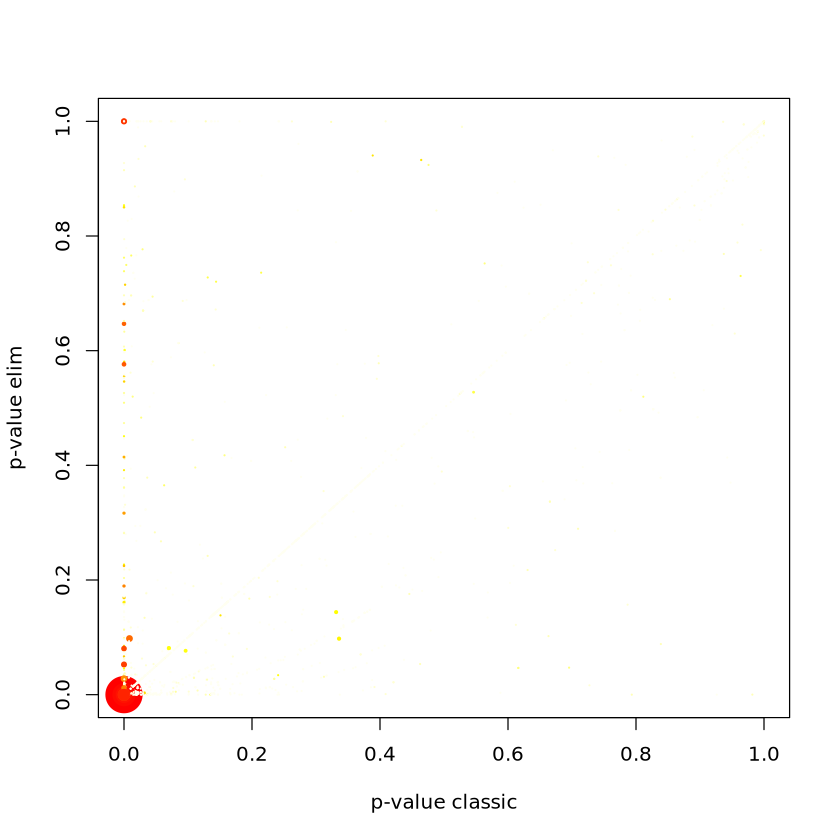

In [44]:
# looks at differences between classic p-value and elim p-value
# elim p-value is less conservative
pValue.classic <- score(resultKS)
pValue.elim <- score(resultKS.elim)[names(pValue.classic)]
gstat <- termStat(GOdata, names(pValue.classic))
gSize <- gstat$Annotated / max(gstat$Annotated) * 4
gCol <- colMap(gstat$Significant)
plot(pValue.classic, pValue.elim, xlab = "p-value classic", ylab = "p-value elim",
     pch = 19, cex = gSize, col = gCol)

In [45]:
sel.go <- names(pValue.classic)[pValue.elim < pValue.classic]
cbind(termStat(GOdata, sel.go), elim = pValue.elim[sel.go], classic = pValue.classic[sel.go])

,Annotated,Significant,Expected,elim,classic
,<int>,<int>,<dbl>,<dbl>,<dbl>
GO:0000026,1,0,0.03,7.877075e-02,2.746176e-01
GO:0000049,31,0,0.79,4.196254e-11,4.390865e-10
GO:0000062,6,0,0.15,8.533689e-01,9.170824e-01
GO:0000309,1,0,0.03,1.661239e-02,1.473767e-01
GO:0000774,2,0,0.05,8.532941e-02,4.072953e-01
GO:0000828,2,0,0.05,2.442491e-15,1.891448e-02
GO:0000829,2,0,0.05,2.442491e-15,1.891448e-02
GO:0000900,1,0,0.03,1.869389e-01,4.301740e-01
GO:0000976,42,0,1.07,1.755745e-01,1.878093e-01


"These GO terms are rather general (having many annotated genes) and their p-values are not significant at the 0.05 level. Therefore these GO terms would not appear in the list of top significant terms. More significant GO terms are less likely to be influenced by this non monotonic behavior."

In [46]:
showSigOfNodes(GOdata, score(resultKS.elim), firstSigNodes = 5, useInfo = 'all')

ERROR: Error in if ((n <- as.integer(n[1L])) > 0) {: missing value where TRUE/FALSE needed


In [52]:
length(sigGenes(GOdata))

[1] 596

In [53]:
graph(GOdata)

A graphNEL graph with directed edges
Number of Nodes = 1732 
Number of Edges = 2265 

performing the test for GO enrichment

In [54]:
test.stat <- new("classicCount", testStatistic = GOFisherTest, name = "Fisher test")
resultFisher <- getSigGroups(GOdata, test.stat)


			 -- Classic Algorithm -- 

		 the algorithm is scoring 343 nontrivial nodes
		 parameters: 
			 test statistic: Fisher test



In [55]:
resultFisher


Description:  Object modified on: 19 Jan 
Ontology: MF 
'classic' algorithm with the 'Fisher test' test
1732 GO terms scored: 12 terms with p < 0.01
Annotation data:
    Annotated genes: 23328 
    Significant genes: 596 
    Min. no. of genes annotated to a GO: 1 
    Nontrivial nodes: 343 

In [57]:
# classical enrichment analysis using Fisher's exact test
resultFis <- runTest(GOdata, algorithm = "classic", statistic = "fisher")
resultFis


			 -- Classic Algorithm -- 

		 the algorithm is scoring 343 nontrivial nodes
		 parameters: 
			 test statistic: fisher




Description:  Object modified on: 19 Jan 
Ontology: MF 
'classic' algorithm with the 'fisher' test
1732 GO terms scored: 12 terms with p < 0.01
Annotation data:
    Annotated genes: 23328 
    Significant genes: 596 
    Min. no. of genes annotated to a GO: 1 
    Nontrivial nodes: 343 

visualizing

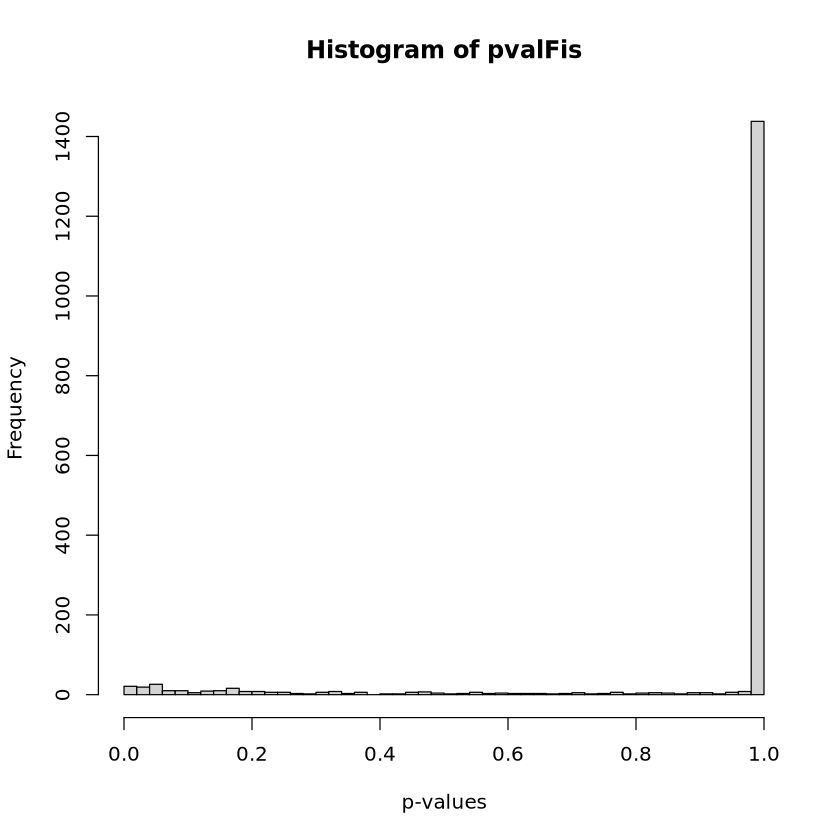

In [58]:
pvalFis <- score(resultFis)
hist(pvalFis, 50, xlab='p-values')

In [60]:
head(allRes)

,GO.ID,Term,Annotated,Significant,Expected,Rank in classicFisher,classicFisher,classicKS,elimKS
,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>
1,GO:0000166,nucleotide binding,2141,60,54.70,149,0.24207,< 1e-30,<1e-30
2,GO:0003674,molecular_function,15560,233,397.54,343,1.00000,7.1e-07,<1e-30
3,GO:0003678,DNA helicase activity,54,2,1.38,183,0.40296,< 1e-30,<1e-30
4,GO:0003774,cytoskeletal motor activity,107,11,2.73,2,9.3e-05,< 1e-30,<1e-30
5,GO:0003777,microtubule motor activity,73,8,1.87,3,0.00054,1.1e-16,<1e-30
6,GO:0003824,catalytic activity,6378,121,162.95,327,0.99998,< 1e-30,<1e-30


In [65]:
BiocManager::install("affyLib")
library(affyLib)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Installing package(s) 'affyLib'

Warning message:
“package ‘affyLib’ is not available for Bioconductor version '3.18'

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Old packages: 'BH', 'brew', 'brio', 'bslib', 'curl', 'data.table', 'DBI',
  'desc', 'digest', 'GenomicAlignments', 'ggfun', 'ggrepel', 'glue',
  'GOSemSim', 'graphlayouts', 'haven', 'htmlwidgets', 'httpuv', 'MASS',
  'Matrix', 'mgcv', 'nlme', 'patchwork', 'pbdZMQ', 'pkgbuild', 'pkgload', 'ps',
  'ragg', 'Rcpp', 'RcppArmadillo', 'RCurl', 'readr', 'reprex', 'Rhtslib',
  'rlang', 'RSQLite', 'scales', 'shadowtext', 'shiny', 'SparseArray'

ERROR: Error in library(affyLib): there is no package called ‘affyLib’


In [66]:
goID <- allRes[10, "GO.ID"]
gt <- printGenes(GOdata, whichTerms = goID, chip = affyLib, numChar = 40)

ERROR: Error in eval(expr, envir, enclos): object 'affyLib' not found


$dag
A graphNEL graph with directed edges
Number of Nodes = 14 
Number of Edges = 14 

$complete.dag
[1] "A graph with 14 nodes."


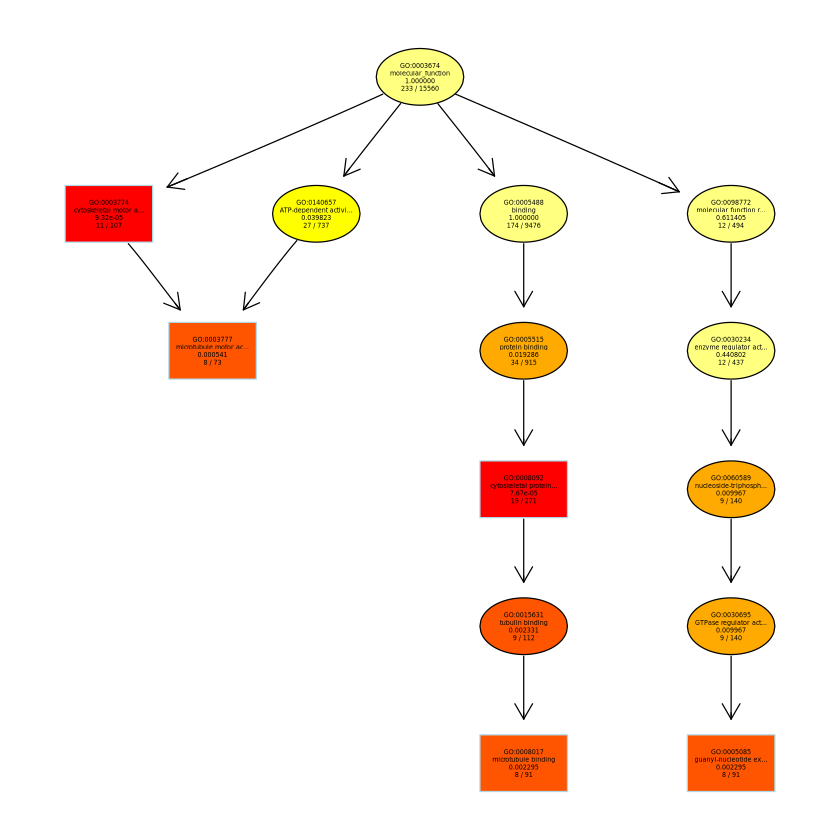

In [67]:
showSigOfNodes(GOdata, score(resultFis), firstSigNodes = 5, useInfo = 'all')

- significant nodes are represented as rectangles

looking at just **biological processes** ontology

In [68]:
GOdata <- new("topGOdata", ontology = "BP", allGenes = geneList,annot = annFUN.gene2GO, gene2GO = geneID2GO)


Building most specific GOs .....

	( 1150 GO terms found. )


Build GO DAG topology ..........

	( 2651 GO terms and 5402 relations. )


Annotating nodes ...............

	( 7977 genes annotated to the GO terms. )



### GO_MWU pipeline/analysis
following pipeline from https://github.com/epigeneticstoocean/AE17_Cvirginica_MolecularResponse/tree/2022_erratum
https://datadryad.org/stash/dataset/doi:10.5061/dryad.8cz8w9gnk


#### first - need table of GO annotations for my sequences 
#### obtained from https://www.uniprot.org/taxonomy/6565
"two-column (gene id - GO terms), tab-delimited, one line per gene, multiple GO terms separated by semicolon. If you have multiple lines per gene, use nrify_GOtable.pl to merge them. Do NOT include genes without GO annotations."

In [20]:
# getting list of *all* genes in the counts matrix
all_genes_counts = read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/counts_and_meta/counts_gene.txt', sep='\t', header = FALSE)
head(all_genes_counts)

all_genes <- select(all_genes_counts, V1)
write.csv(all_genes, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/GO_analysis/all_gene_ID.csv')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ATP6,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,COX1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,COX2,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,COX3,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,CYTB,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,LOC111099029,7,13,15,11,16,12,9,15,11,⋯,9,6,1,30,13,15,0,0,4,0


ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function ‘select’ for signature ‘"data.frame"’


convert the list of GenBank gene id's to GO terms with DAVID Gene ID Conversion Tool https://david.ncifcrf.gov/conversion.jsp

In [ ]:
go_ids = read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/GO_analysis/uniprotkb_GOids.txt', sep='\t')
head(go_ids)

In [ ]:
# rename column names
colnames(go_ids) = c('gene_name','GO_id', 'all_GO_terms', 'GO_BP', 'GO_CC', 'GO_MF')
# BP = biological process
# CC = cellular component
# MF = molecular function

In [ ]:
head(go_ids)

In [ ]:
GO <- as.matrix(gene_GOid)
head(GO)

In [ ]:
head(gene_GOid)

In [ ]:
# making a new df of only the gene name and GO ID
gene_GOid <- select(go_ids, gene_name, GO_id)
head(gene_GOid)

write.csv(gene_GOid, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/GO_enrichment_analysis/gene_GOid.csv', row.names=FALSE)
write.table(GO, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/GO_enrichment_analysis/gene_GOid.tab', row.names=FALSE, sep = '\t')

#### second - table of measure of interest for my sequences
"two columns of comma-separated values: gene id, continuous measure of change such as log(fold-change). To perform standard GO enrichment analysis based on Fisher's exact test, use binary measure (1 or 0, i.e., either sgnificant or not). To analyze modules derived from WGCNA, specify 0 for genes not included in the module and the kME value (number between 0 and 1, module membership score) for genes included in the module."

In [ ]:
gene_list = read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/significant_genes/sig_p1_wc_genes.csv")
head(gene_list)

In [ ]:
rownames(gene_list) = gene_list$Row.names
head(gene_list)

In [ ]:
# only grabbing the columns I want
gene_list2 <- select(gene_list, Row.names, log2FoldChange)
head(gene_list2)

# changing column names
colnames(gene_list2) = c('gene_name', 'logfold')
head(gene_list2)

In [ ]:
write.table(gene_list2, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/GO_enrichment_analysis/gene_l2fc.tab', row.names=FALSE)

In [ ]:
# creating new df only including gene id and log2FoldChange
gene_l2fc <- select(gene_list, log2FoldChange) # selecting specific columns
head(gene_l2fc)

write.csv(gene_l2fc, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/GO_enrichment_analysis/gene_l2fc.csv')

In [ ]:
# creating new df only including gene id and padj
gene_padj <- select(gene_list, padj)
head(gene_padj)

write.csv(gene_padj, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/GO_enrichment_analysis/gene_padj.csv')

#### creating another file
this one is binary - 0=not significant, 1=significant 

allows me to perform standard GO enrichment analysis based on Fisher's exact test

In [ ]:
df = read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/GO_enrichment_analysis/sig_p1_wc_genes_ALL.csv')
#head(df)

df$significance <- ifelse(is.na(df$log2FoldChange), 0, 1)
#head(df)

sig_df <- select(df, X, significance)
#head(sig_df)

colnames(sig_df) = c('gene_name', 'signif')
head(sig_df)

write.csv(sig_df, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/GO_enrichment_analysis/gene_signif.csv')

#### Other things needed before analysis starts (all in the same directory):
- scripts: GO_MWU.R, gomwu_a.pl, gomwu_b.pl, gomwu.functions.R
- GO hierarchy file (go.obo, http://www.geneontology.org/GO.downloads.ontology.shtml)

### topGO package
following pipeline outlined here: https://datacatz.wordpress.com/2018/01/19/gene-set-enrichment-analysis-with-topgo-part-1/

In [ ]:
source("https://bioconductor.org/biocLite.R")
biocLite("topGO")
biocLite("GO.db")
biocLite("biomaRt")
biocLite("Rgraphviz")
 
# Load the required R packages
library(topGO)
library(GO.db)
library(biomaRt)
library(Rgraphviz)

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("topGO")

In [ ]:
library(topGO)

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("Go.db")

library(GO.db)

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("Rgraphviz")

library(Rgraphviz)

#### Step 1: preparing the data in the required format
creating two lists of gene names
- candidate list: list of genes of interest (so significant genes)
- bg_genes: gene universe (all genes in the experiment)

In [ ]:
# Read in genes of interest
candidate_list <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/significant_genes/sig_p1_wc_genes.csv')
rownames(candidate_list) = candidate_list$Row.names
head(candidate_list)
candidate_list= as.character(candidate_list[,2])
head(candidate_list)

In [ ]:
# Gene universe file - all genes in our experiment (all genes in counts matrix)
exp_data <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/counts_and_meta/counts_meta.csv')
rownames(exp_data) = exp_data$X
head(exp_data)

bg_genes=as.character(exp_data[,1])
head(bg_genes)

In [ ]:
length(candidate_list) # 405 genes 
length(bg_genes) # 39,504 genes

#### step 2: create GO annotation
except CV is not in the biomaRt database - but I think I already created this from up above in the go_mwu section

In [ ]:
head(gene_GOid)

In [ ]:
# remove any candidate genes without GO annotation
keep = candidate_list %in% gene_GOid[,1] # does c_list have GO annotation
keep = which(keep == TRUE) # only keep c_list that do
candidate_list = candidate_list[keep] # rewrite c_list to only include ones with GO annotation

In [ ]:
# make named factor showing which genes are of interest
geneList=factor(as.integer(bg_genes %in% candidate_list))
names(geneList)= bg_genes
geneList

#### Step 3: Make topGO data object

In [ ]:
GOdata=new('topGOdata', ontology='BP', allGenes = geneList, annot = annFUN.gene2GO, gene2GO = gene_GOid)

### clusterProfiler package

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("clusterProfiler")

In [ ]:
library(clusterProfiler)

In [ ]:
if (!requireNamespace("AnnotationDbi", quietly = TRUE)) {
  BiocManager::install("AnnotationDbi")
}

In [ ]:
if (!requireNamespace("AnnotationHub", quietly = TRUE)) {
  BiocManager::install("AnnotationHub")
}

ah <- AnnotationHub::AnnotationHub()
query(ah, "Crassostrea virginica")


In [ ]:
# Install and load necessary packages
if (!requireNamespace("clusterProfiler", quietly = TRUE)) {
  install.packages("clusterProfiler")
}

# Example gene list (replace with your own)
gene_list <- c("gene1", "gene2", "gene3", ...)

# Create a custom list of gene-to-GO mappings
custom_annotations <- data.frame(
  GeneID = gene_list,
  GOID = c("GO:0001234", "GO:5678", "GO:9012", ...)  # Replace with actual GO terms
)

# Perform GO enrichment analysis with topGO
library(topGO)

# Create a topGOdata object
godata <- new("topGOdata", ontology = "BP", allGenes = custom_annotations$GeneID, geneSel = custom_annotations$GeneID)

# Run enrichment analysis
result <- runTest(godata, algorithm = "classic", statistic = "fisher")

# Visualize the results
plot(result, goCategory = "BP", ranksOf = "classic", main = "GO Enrichment Analysis")


In [ ]:
listDatasets()

In [ ]:
org_db <- AnnotationDbi::org.Cv.eg.db

In [ ]:
sig_p1_genes = read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/significant_genes/sig_p1_wc_genes.csv")
head(sig_p1_genes)

In [ ]:
# effects of phase 1 warm vs. control (ignoring effects of phase 2)
gene_list = sig_p1_genes$Row.names
gene_list

In [ ]:
go_results <- enrichGO(gene = gene_list)

In [ ]:
if (!requireNamespace("AnnotationHub", quietly = TRUE))
    BiocManager::install("AnnotationHub")

In [ ]:
library(AnnotationHub)
ah <- AnnotationHub()
query(ah, "Crassostrea virginica")

In [ ]:
sig_p1_genes = read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/significant_genes/sig_p1_wc_genes.csv")
head(sig_p1_genes)

In [ ]:
# effects of phase 1 warm vs. control (ignoring effects of phase 2)
gene_list = sig_p1_genes$Row.names
gene_list

In [ ]:
oyster_annotations <- query(ah, c("oyster", "Crassostrea virginica"))

In [ ]:
oyster_annotations

In [ ]:
# Assuming the gene symbols are in a column named "GeneSymbol"
gene_symbols <- oyster_annotations$GeneSymbol

In [ ]:
# Assuming you have already loaded AnnotationHub and obtained oyster_annotations
# Print the names of the columns in the annotation data
colnames(oyster_annotations)

In [ ]:
enrich_result <- enrichGO(gene = gene_list, OrgDb = org.Crassostrea_virginica.eg.sqlite)

In [ ]:
if (!requireNamespace("biomaRt", quietly = TRUE))
    BiocManager::install("biomaRt")

library(biomaRt)
mart <- useMart("ensembl", dataset = "cgigas_uk_roslin_v1")

In [ ]:
# Load the biomaRt package if not loaded
if (!requireNamespace("biomaRt", quietly = TRUE))
    BiocManager::install("biomaRt")

library(biomaRt)

# List available datasets
list_db = listDatasets(useMart("ensembl"))
list_db[0:75,]

In [ ]:
ensembl = useEnsembl(biomart="ensembl")
listDatasets(ensembl)[0:55,]

In [ ]:
listEnsembl()
ensembl <- useEnsembl(biomart = "genes")

In [ ]:
ensembl

In [ ]:
searchDatasets(mart = ensembl, pattern = "cvirginica")

In [ ]:
# Assuming you've already created the mart object
mart <- useMart("ensembl", dataset = "cvirginica_gene_ensembl")

# Get a sample of the data (adjust attributes as needed)
sample_data <- getBM(attributes = c("ensembl_gene_id", "external_gene_name", "description"),
                    mart = mart, n = 5)

# Print the sample data
print(sample_data)

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("topGO")

In [ ]:
library(topGO)